# Load libraries and data

In [1]:
!pip install whit-phys-util 1>/dev/null

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from string import ascii_uppercase
import scipy.constants as sciConst

# Connect to GitHub

In [5]:
repo = buc.local_repository("https://github.com/PS251-FA25/leds-and-plancks-constant-1b")

Cloning repository from GitHub.


In [6]:
repo.pull()

In [7]:
df=pd.read_excel("LeddataOF.xlsx")
df.head()
df

,Unnamed: 0,wave lengtth (nm),FWHM (nm),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,a,361.0,NaN,NaN,NaN,NaN
1,b,375.0,NaN,NaN,NaN,NaN
2,c,390.4,NaN,NaN,dim purple,NaN
3,d,466.2,20.0,NaN,bright blue,NaN
4,e,520.2,20.0,NaN,brigh green,NaN
5,f,575.2,160.0,NaN,yellow,very intresting
6,g,590.1,10.0,NaN,orange,NaN
7,h,630.9,14.0,NaN,red,NaN
8,i,650.4,18.0,NaN,dim red,NaN
9,j,780.0,30.0,NaN,NaN,NaN


In [8]:
leds = list(ascii_uppercase[0:12])
print(leds)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


In [9]:
leds[5]

'F'

In [10]:
dfc ={}

In [11]:
for led in leds:
  dfc[led] = pd.read_csv(f'LED-{led}-current-data.csv')

In [12]:
dfc['A'].head()

,Voltage (V),Current (A)
0,0.0,0.000002
1,0.1,0.000003
2,0.2,0.000003
3,0.3,0.000003
4,0.4,0.000003


In [13]:
wavelengths = pd.read_csv('LED_wavelengths.csv', index_col=0)
wavelengths.rename(columns={'wave lengtth (nm)': 'Wavelength (nm)'}, inplace = True)
wavelengths

,Wavelength (nm),FWHM (nm),Unnamed: 3,Unnamed: 4,Unnamed: 5
a,361.0,NaN,NaN,NaN,NaN
b,375.0,NaN,NaN,NaN,NaN
c,390.4,NaN,NaN,dim purple,NaN
d,466.2,20.0,NaN,bright blue,NaN
e,520.2,20.0,NaN,brigh green,NaN
f,575.2,160.0,NaN,yellow,very intresting
g,590.1,10.0,NaN,orange,NaN
h,630.9,14.0,NaN,red,NaN
i,650.4,18.0,NaN,dim red,NaN
j,780.0,30.0,NaN,NaN,NaN


In [14]:
V_total = {}
I = {}
for led in leds:
  V_total[led] = dfc[led]['Voltage (V)']
  I[led] = dfc[led]['Current (A)']

In [15]:
led_sets = [leds[0:4], leds[4:8], leds[8:12]]
numSets = len(led_sets)

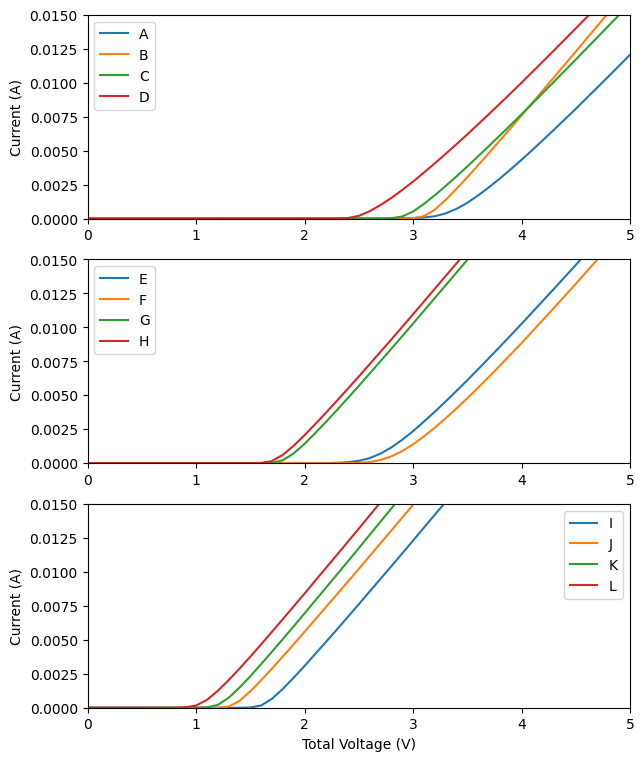

In [16]:
fig1, ax1 = plt.subplots(numSets, 1, figsize=(7, 9))
for i in range(numSets):
  for led in led_sets[i]:
    ax1[i].plot(V_total[led], I[led], label=led)
  ax1[i].set_ylabel("Current (A)")
  ax1[i].set_xlim(0,5)
  ax1[i].set_ylim(0, 0.015)
  ax1[i].legend()
ax1[numSets-1].set_xlabel("Total Voltage (V)");

In [17]:
V_LED = {}
for led in leds:
  V_LED[led] = V_total[led] - 100.0*I[led]

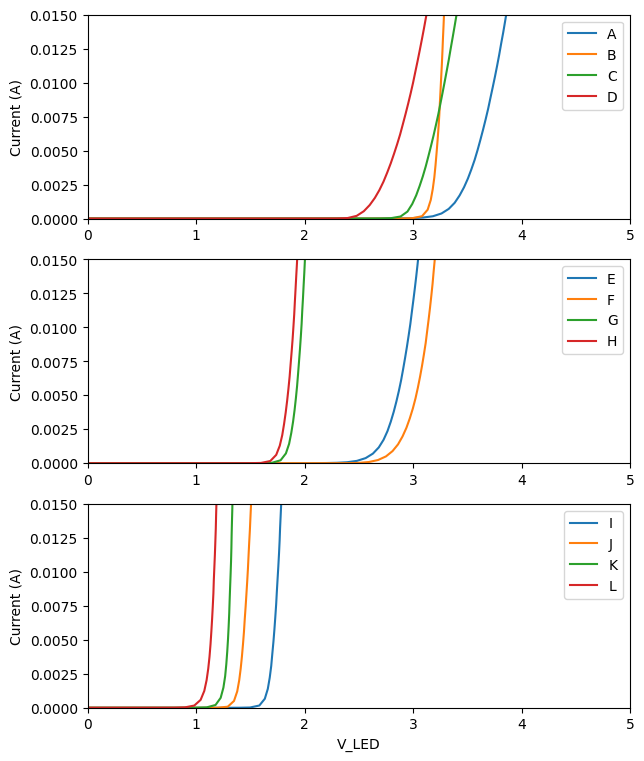

In [18]:
fig2, ax2 = plt.subplots(numSets, 1, figsize=(7, 9))
for i in range(numSets):
  for led in led_sets[i]:
    ax2[i].plot(V_LED[led], I[led], label=led)
  ax2[i].set_ylabel("Current (A)")
  ax2[i].set_xlim(0,5)
  ax2[i].set_ylim(0, 0.015)
  ax2[i].legend()
ax2[numSets-1].set_xlabel("V_LED");

#Prototyping location activation



In [19]:
base_indices = np.where(V_LED['A']<=0.6)[0]
avgBase = I['A'][base_indices].mean()
stdBase = I['A'][base_indices].std()
print(avgBase, stdBase)

2.5714285714285716e-06 5.345224838248488e-07


In [20]:
thresh = avgBase + 5*stdBase
print(thresh)

5.244040990552816e-06


In [21]:
thresh = 1e-4
above_thresh_indices = np.where(I['A']>thresh)
first_above_thresh = above_thresh_indices[0][0]
print(first_above_thresh)

32


In [22]:
V_LED['A'][first_above_thresh]

np.float64(3.183100000000001)

In [23]:
V_on_list = []
for led in leds:
  above_thresh_indices = np.where(I[led] > thresh)
  first_above_thresh = above_thresh_indices[0][0]
  V_on_list.append(V_LED[led][first_above_thresh])

In [24]:
V_on = np.array(V_on_list)
print(V_on)

[3.1831 3.0828 2.885  2.4803 2.4833 2.6771 1.7792 1.6845 1.5837 1.35
 1.1798 0.9839]


# Determining h

In [25]:
x_data = 1 / wavelengths['Wavelength (nm)']


In [26]:
df_plot = pd.DataFrame(data={'inv wavelength': x_data, 'V_on': V_on_list})
df_plot

,inv wavelength,V_on
a,0.002770,3.1831
b,0.002667,3.0828
c,0.002561,2.8850
d,0.002145,2.4803
e,0.001922,2.4833
f,0.001739,2.6771
g,0.001695,1.7792
h,0.001585,1.6845
i,0.001538,1.5837
j,0.001282,1.3500


In [27]:
df_plot.drop(['e','f'],inplace=True)

In [28]:
fitTable, fitFunc = buc.prettyPolyFit(df_plot['inv wavelength'], df_plot['V_on'])
fitTable

,slope,intercept
value,1269.622094,-0.323948
uncertainty,50.763437,0.098684


In [29]:
slope = fitTable.iloc[0,0]
dSlope = fitTable.iloc[1,0]
print(slope, dSlope)
inter= fitTable.iloc[0,1]
dinter = fitTable.iloc[1,1]


1269.622094093732 50.76343675312388


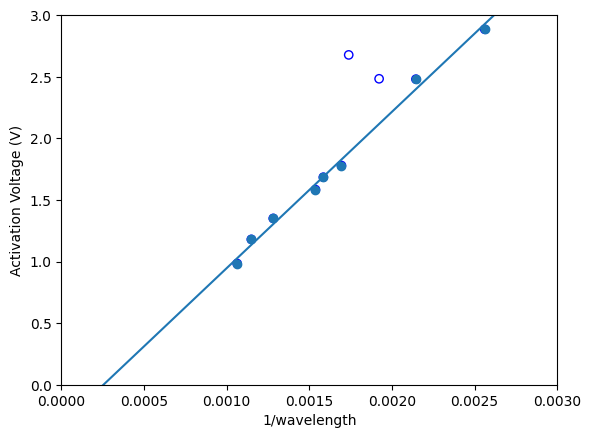

In [30]:
fig3, ax3 = plt.subplots()
ax3.scatter(x_data, V_on_list,marker='o',facecolors='none',edgecolors='blue')
ax3.scatter(df_plot['inv wavelength'], df_plot['V_on'])
ax3.set_xlim(0,.003)
ax3.set_ylim(0,3)
ax3.set_xlabel("1/wavelength")
ax3.set_ylabel("Activation Voltage (V)");
t_fit = np.linspace(0,0.003,100);
ax3.plot(t_fit, fitFunc(t_fit))

In [31]:
e = sciConst.e
c = sciConst.c
h = (slope*(1*10**-9))*(e/c)
dh = (dSlope*(1*10**-9))*(e/c)
print(h, dh)

6.7852235734600325e-34 2.7129432397993117e-35


In [32]:
percentErr = (h - sciConst.h)/sciConst.h*100
print(percentErr)

2.4019278374231012


In [33]:
e = sciConst.e
c = sciConst.c
Etherm = (inter)
dEtherm = (dinter)
print(Etherm, dEtherm)

-0.32394826798607274 0.09868403036461088


#Reflection


The experimental data is consistent with all LEDs sharing a single value of E thermal. The linear fit of $V_0$ versus $1/λ$ yielded one intercept of -0.324 ± 0.099 eV, which represents the common thermal offset. LED E and F were very far from the best fit line since they work differently than the other LEDs, since their FWHM's were significantly larger.  Because the individual data points for each LED lie close to the best-fit line within experimental uncertainty, it is reasonable to conclude that the LEDs have the same E thermal value.